## imports

In [1]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from facenet_pytorch import MTCNN, InceptionResnetV1

## instantiate face detector and recognizer models

In [2]:
# If required, create a face detection pipeline using MTCNN:
mtcnn = MTCNN()

# Create an inception resnet (in eval mode):
resnet = InceptionResnetV1(pretrained='vggface2').eval()

  0%|          | 0.00/107M [00:00<?, ?B/s]

## load a photo, run face detection, and face recognition on the photo

In [4]:
img = Image.open("/Users/Ashish.Jha/Downloads/albert-einstein-gettyimages-544750041.jpg")

# Get cropped and prewhitened image tensor
img_cropped = mtcnn(img)

# Calculate embedding (unsqueeze to add batch dimension)
img_embedding = resnet(img_cropped.unsqueeze(0))

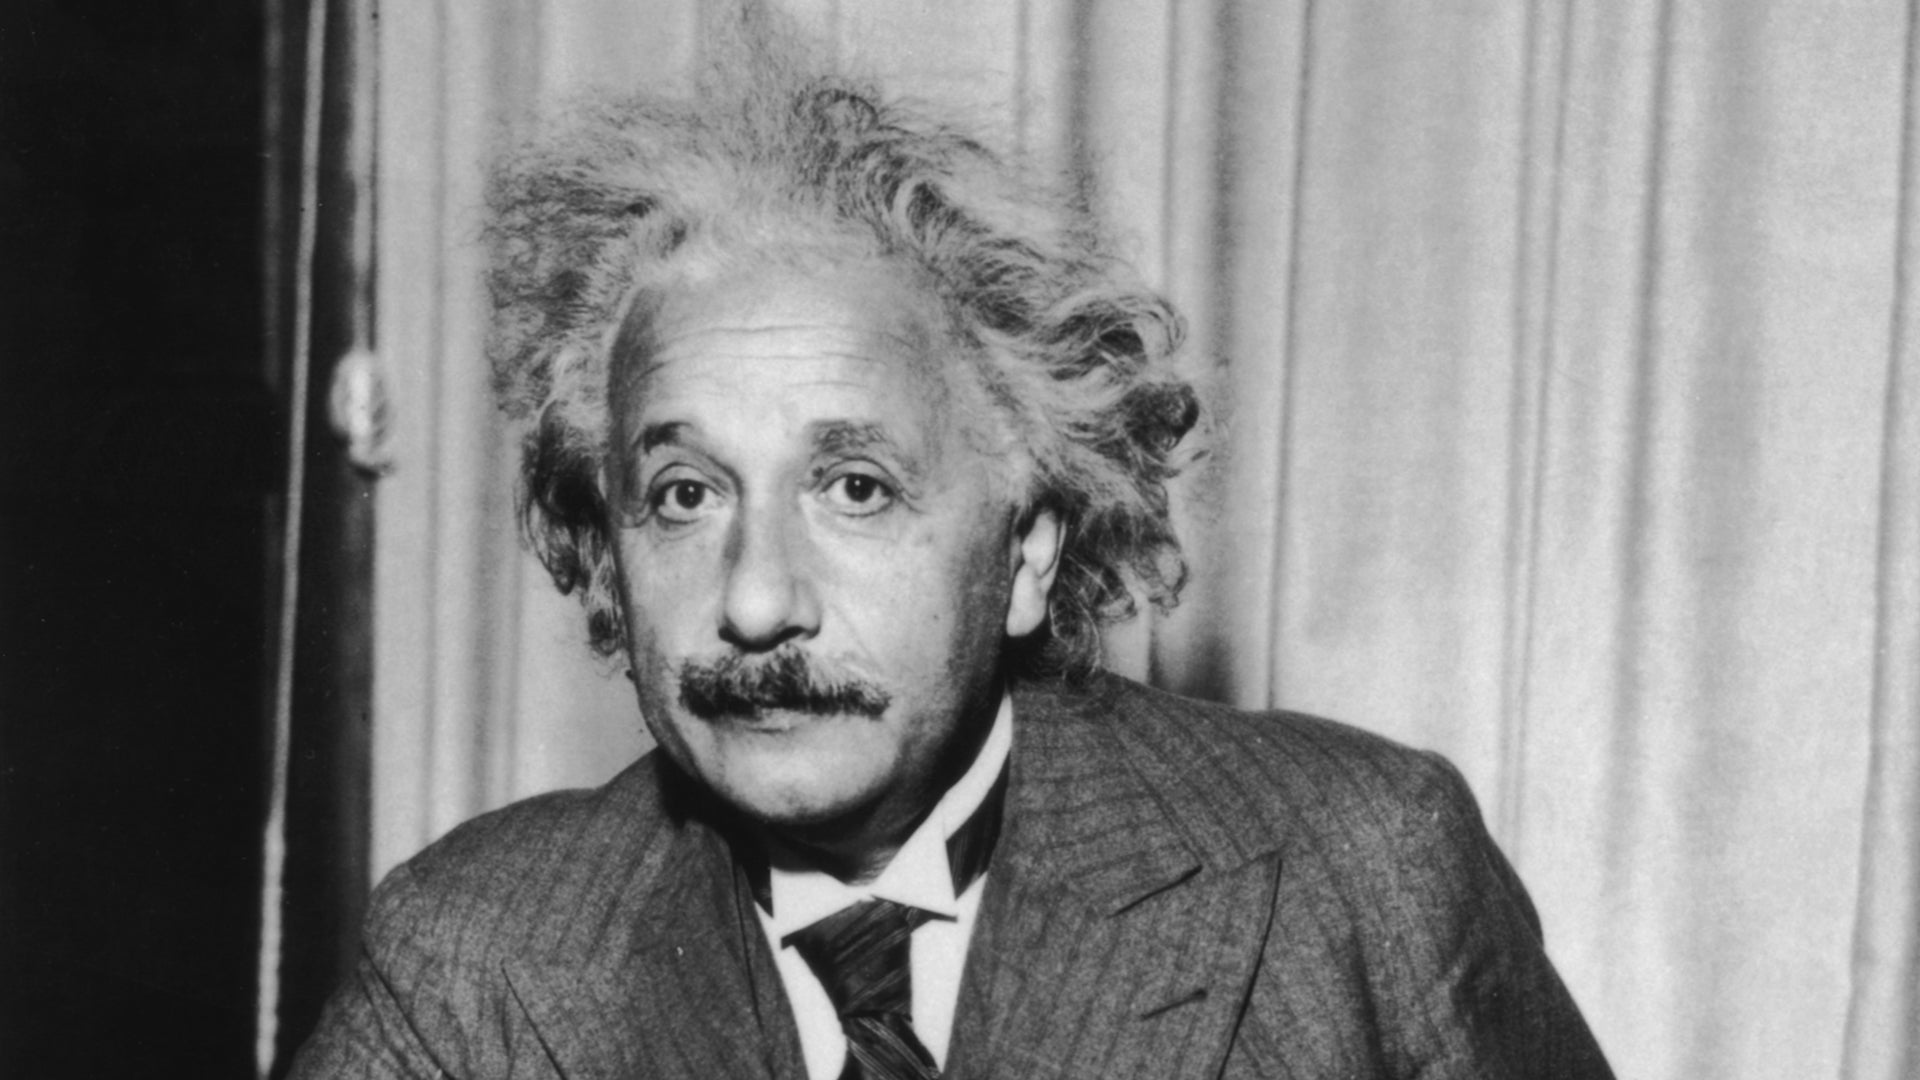

In [15]:
img

## visualize detected face box (crop)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


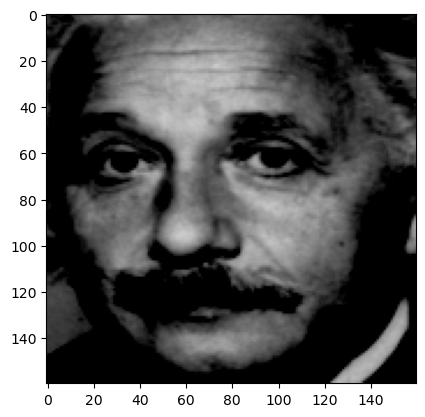

In [14]:
plt.imshow(img_cropped.permute(1, 2, 0).numpy());

## load another photo, detect and recognize face again

In [19]:
img2 = Image.open("/Users/Ashish.Jha/Downloads/g7MoPNefE8EoXTyfzMgYsj-1200-80.jpg")

# Get cropped and prewhitened image tensor
img_cropped2 = mtcnn(img2)

# Calculate embedding (unsqueeze to add batch dimension)
img_embedding2 = resnet(img_cropped2.unsqueeze(0))

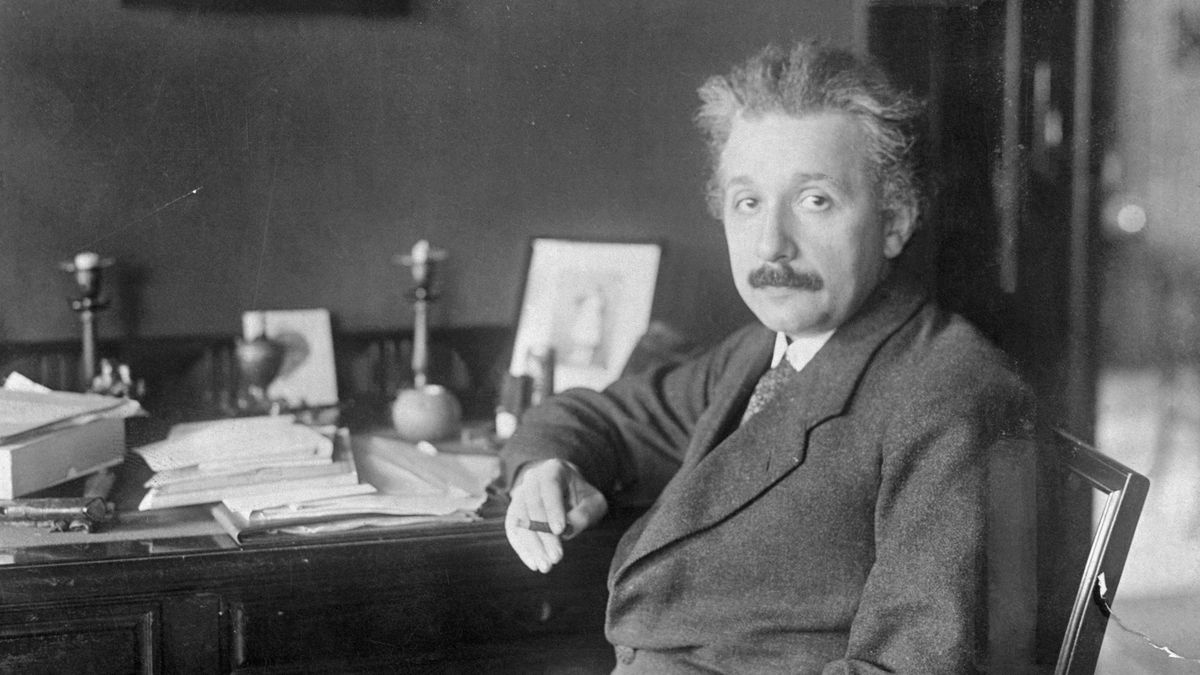

In [20]:
img2

## visualize face box (crop)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


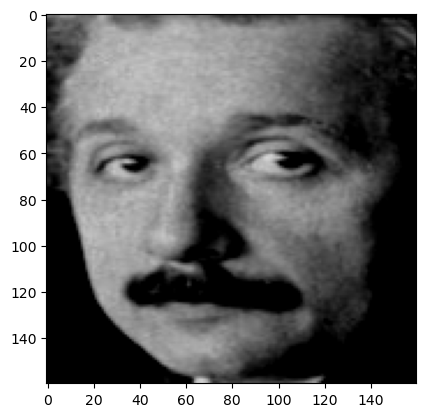

In [21]:
plt.imshow(img_cropped2.permute(1, 2, 0).numpy());

In [23]:
img_embedding.shape

torch.Size([1, 512])

## calculate similarity between the previous two faces

In [37]:
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)
cos(img_embedding, img_embedding2)

tensor([0.7652], grad_fn=<SumBackward1>)

## process a third photo

In [33]:
img3 = Image.open("/Users/Ashish.Jha/Downloads/albert-einstein-sticks-out-his-tongue-when-asked-by-news-photo-1681316749.jpg")

# Get cropped and prewhitened image tensor
img_cropped3 = mtcnn(img3)

# Calculate embedding (unsqueeze to add batch dimension)
img_embedding3 = resnet(img_cropped3.unsqueeze(0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


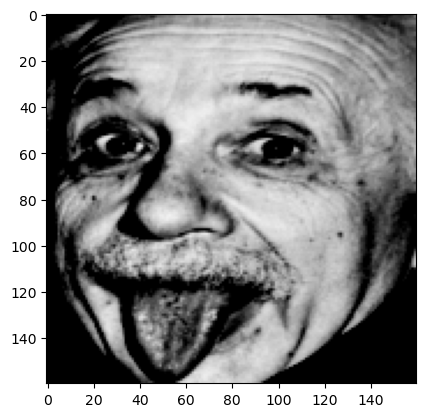

In [34]:
plt.imshow(img_cropped3.permute(1, 2, 0).numpy());

## calculate similairity between the third and first photo faces

In [36]:
cos(img_embedding, img_embedding3)

tensor([0.6557], grad_fn=<SumBackward1>)

## calculate similarity with a fourth face photo - this time a different person

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([0.0992], grad_fn=<SumBackward1>)

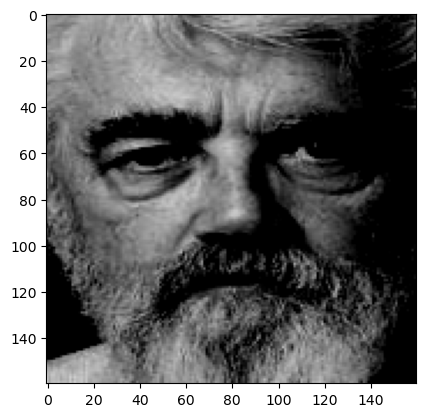

In [43]:
img4 = Image.open("/Users/Ashish.Jha/Downloads/dibujo20111026_john_mccarthy_father_artificial_intelligence.jpg")

# Get cropped and prewhitened image tensor
img_cropped4 = mtcnn(img4)

# Calculate embedding (unsqueeze to add batch dimension)
img_embedding4 = resnet(img_cropped4.unsqueeze(0))

plt.imshow(img_cropped4.permute(1, 2, 0).numpy());

cos(img_embedding, img_embedding4)

## calculate similarity between the first photo face and the face from an identity document

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([0.6154], grad_fn=<SumBackward1>)

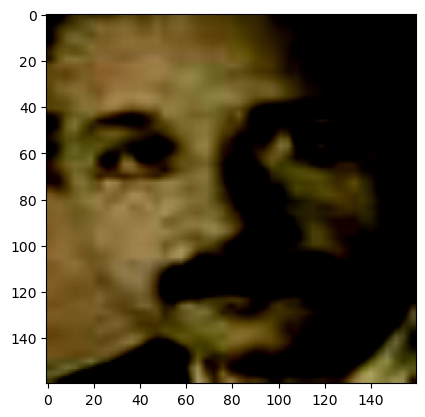

In [51]:
img5 = Image.open("/Users/Ashish.Jha/Downloads/Albert_Einstein_-_Passport_issued_by_the_Swiss_Embassy_in_Berlin,_Germany,_1923.jpg")

# Get cropped and prewhitened image tensor
img_cropped5 = mtcnn(img5)

# Calculate embedding (unsqueeze to add batch dimension)
img_embedding5 = resnet(img_cropped5.unsqueeze(0))

plt.imshow(img_cropped5.permute(1, 2, 0).numpy());

cos(img_embedding, img_embedding5)

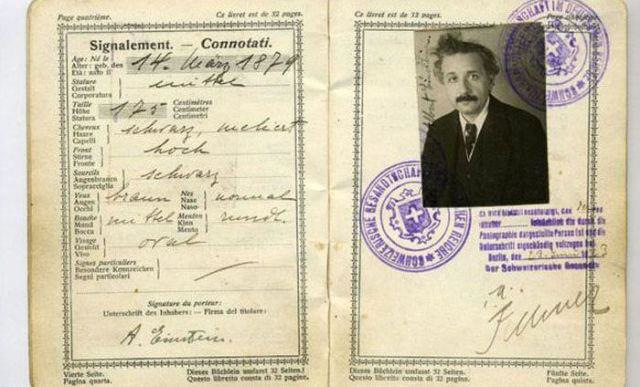

In [52]:
img5

## calculate facial similairity between first photo & a different person's identity document 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([0.0252], grad_fn=<SumBackward1>)

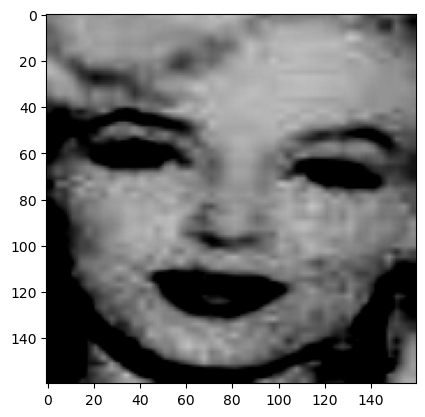

In [54]:
img6 = Image.open("/Users/Ashish.Jha/Downloads/5d2a1fa3aeb19e8d52eff7f0ec4f6785.jpg")

# Get cropped and prewhitened image tensor
img_cropped6 = mtcnn(img6)

# Calculate embedding (unsqueeze to add batch dimension)
img_embedding6 = resnet(img_cropped6.unsqueeze(0))

plt.imshow(img_cropped6.permute(1, 2, 0).numpy());

cos(img_embedding, img_embedding6)

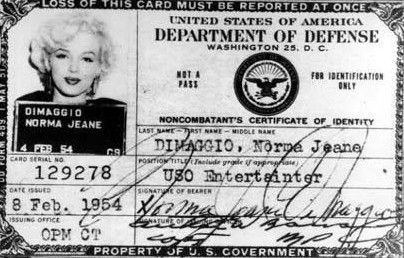

In [55]:
img6